To start, we need to import the modules we'll need later and provide a valid email address to use with Entrez.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio import Entrez
import csv
from collections import defaultdict

In [2]:
#Register with Entrez
Entrez.email = 'kalawson@vassar.edu'

Next, we decide what we want to search for and open an API to access PubMed data, using ESearch to allow us to retrieve full records from PubMed.  Below, define the keyword you want to search for.  It should be formatted 'like+this'.  A search term for alcohol addiction has been given as an example.  You can also search in a specific area, like in the title, list of authors ('AuthorList'), or journal in which the article was published ('FullJournalName') and specify the range of years you're interested in.

In [3]:
#Define keyword, area, and range of years that you want to search on PubMed
keyword = 'alcoholism'
area = 'Title'
start_year_range = '2005'
end_year_range = '2015'

In [ ]:
#Use eSearch to return PMIDs about your topic

In [4]:
handle = Entrez.esearch(db='pubmed', term=keyword, field = area, retmode='xml', idtype='acc', mindate=start_year_range, maxdate=end_year_range)
data = Entrez.read(handle)

ESearch gives us a lot of information, but it's in the form of ID numbers, not titles, authors, or any other relevant information.  To make it easier to read, we'll use ESummary to search PubMed using the ID numbers we got from ESearch.

In [5]:
#Use eSummary to convert PMIDs to useful information
UID = data['IdList']
print(UID)

['26706806', '26704671', '26672247', '26661206', '26640531', '26626033', '26589585', '26580209', '26578987', '26578046', '26559000', '26537217', '26529024', '26502590', '26475672', '26455281', '26452454', '26437315', '26426670', '26418276']


In [6]:
attributes_list = []

for ID in range(len(UID)):
    record = Entrez.esummary(db='pubmed', id=UID[ID])
    attributes_list.append(Entrez.read(record))

In [7]:
for attributes in attributes_list:
    for information in attributes:
        for key1, value1 in information.items():
            print(key1, value1)

Item []
Id 26706806
PubDate 2015 Dec 15
EPubDate 2015 Dec 15
Source Adicciones
AuthorList ['Pascual Pastor F']
LastAuthor Pascual Pastor F
Title Alcoholism and mutual help. From necessity to evidence.
Volume 27
Issue 4
Pages 243-5
LangList ['English', 'Spanish']
NlmUniqueID 9605506
ISSN 0214-4840
ESSN 
PubTypeList ['Editorial']
RecordStatus PubMed - indexed for MEDLINE
PubStatus epublish
ArticleIds {'pubmed': ['26706806'], 'medline': [], 'rid': '26706806', 'eid': '26706806'}
History {'pubmed': ['2015/12/27 06:00'], 'medline': ['2017/08/24 06:00'], 'entrez': '2015/12/27 06:00'}
References []
HasAbstract 1
PmcRefCount 0
FullJournalName Adicciones
ELocationID 
SO 2015 Dec 15;27(4):243-5
Item []
Id 26704671
PubDate 2015 Dec
EPubDate 
Source Alcohol
AuthorList ['Roberto M', 'Varodayan F']
LastAuthor Varodayan F
Title Commentary on the Third International Congress on "Alcoholism and Stress: A Framework for Future Treatment Strategies".
Volume 49
Issue 8
Pages e1-2
LangList ['English']
NlmUni

This returns all the attributes for the most recent articles published in PubMed that include our keyword.  We can compile these attributes into a .csv file to make them easy to share.

In [ ]:
#Compile attributes to a .csv file

In [8]:
import csv
csv_columns = ['Item','Id','PubDate', 'EPubDate', 'Source', 'AuthorList', 'LastAuthor', 'Title', 'Volume', 'Issue', 'Pages', 'LangList', 'NlmUniqueID', 'ISSN', 'ESSN', 'PubTypeList', 'RecordStatus', 'PubStatus', 'ArticleIds', 'DOI', 'History', 'References', 'HasAbstract', 'PmcRefCount', 'FullJournalName', 'ELocationID', 'SO']
dict_data = attributes_list
csv_file = "PubMed_Output.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for info in dict_data:
            for attribute_info in info:
                writer.writerow(attribute_info)
except IOError:
    print("I/O error")

After formatting the citation and putting it into a .csv file, we can to display the data as a bar graph of number of references for each of the articles.

In [ ]:
#Format information into a citation

In [9]:
citation = defaultdict(list)

for cite in attributes_list: 
    for attribute_cite in cite:
        for key, value in attribute_cite.items():
            citation[key].append(value)

print(citation['LastAuthor'])

['Pascual Pastor F', 'Varodayan F', 'Liu H', 'Pitel AL', 'Wan GR', 'Naegle M', 'Dabur R', 'Porjesz B', 'Desmond JE', 'Ben Hadj Ali B', 'Cservenka A', 'Sinha R', 'Choate PW', 'Nau JY', 'Petrakis IL', 'Stefanski R', 'Theiss JA', 'Serecigni JG', 'Fang YW', 'Bermpohl F']


In [ ]:
#Produce bar graph from citation that counts number of references per author

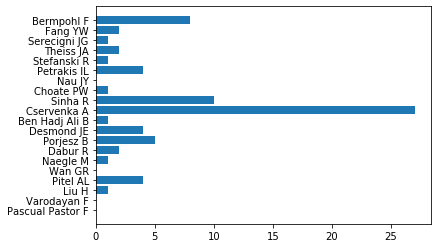

In [10]:
attribute_data_plot = plt.barh(citation['LastAuthor'], citation['PmcRefCount'])
plt.ylabel = 'Number of References'
plt.xlabel = 'Author'
plt.title = 'Number of References by Author'
plt.show()

Alternatively, if you chose to search by author instead of title at the top, you can display a bar graph to see that author's most cited works.

In [11]:
#author_data  = plt.barh(citation['Title'], citation['PmcRefCount'])
#plt.ylabel = 'Number of References'
#plt.xlabel = 'Title'
#plt.title = "Most Cited Publications"
#plt.show()